# Climate Change

## Purpose

To perform an unbiased and thourough analysis of the data surrounding climate change in order to form a more scientific opinon related to the contraversial topic. 

## Data

### CO2 PPM - Trends in Atmospheric Carbon Dioxide:

#### Description

Was sourced from the US Government's Earth System Research Laboratory, Global Monitoring Division. In particular, I will be using the Mauna Loa series. This data is a continuous series since 1958. 

Data are reported as a dry air mole fraction defined as the number of molecules of carbon dioxide divided by the number of all molecules in air, including CO2 itself, after water vapor has been removed. The mole fraction is expressed as parts per million (ppm). Example: 0.000400 is expressed as 400 ppm.

#### Sources

   - [Trends in Atmospheric Carbon Dioxide, Mauna Loa, Hawaii](http://www.esrl.noaa.gov/gmd/ccgg/trends/index.html)

### Global Temperature Time Series

#### Description

Global Temperature Time Series. Data are included from the GISS Surface Temperature (GISTEMP) analysis and the global component of Climate at a Glance (GCAG). Two datasets are provided: 1) global monthly mean and 2) annual mean temperature anomalies in degrees Celsius from 1880 to the present. The monthly and annual datasets were chosen.

#### Sources

   - [GISTEMP Global Land-Ocean Temperature Index](http://data.giss.nasa.gov/gistemp)
   - [Global component of Climate at a Glance (GCAG)](http://www.ncdc.noaa.gov/cag/data-info/global)

### Global CO2 Emissions from Fossil Fuels since 1751

#### Description

Global CO2 Emissions from fossil-fuels annually since 1751 till 2014.

#### Sources

   - [Carbon Dioxide Information Analysis Center (CDIAC)](http://cdiac.ess-dive.lbl.gov/ftp/ndp030/CSV-FILES/global.1751_2014.csv)

## Data Importation and Verification

I need to import the data from the csv's and verify that the import process hasn't left any artifacts in the sets.

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

co2_raw = pd.read_csv('co2-mm-mlo_csv.csv', parse_dates=True, index_col='Date')

In [192]:
print(co2_raw.head(2))
print()
print(co2_raw.describe())
print()
print(co2_raw.info())

            Decimal Date  Average  Interpolated   Trend  Number of Days
Date                                                                   
1958-03-01      1958.208   315.71        315.71  314.62              -1
1958-04-01      1958.292   317.45        317.45  315.29              -1

       Decimal Date     Average  Interpolated       Trend  Number of Days
count    727.000000  727.000000    727.000000  727.000000      727.000000
mean    1988.458333  349.555846    353.640702  353.633054       18.341128
std       17.500926   52.068588     27.443136   27.369003       12.242015
min     1958.208000  -99.990000    312.660000  314.620000       -1.000000
25%     1973.333500  328.425000    328.555000  329.295000       -1.000000
50%     1988.458000  351.310000    351.310000  351.370000       24.000000
75%     2003.583500  375.700000    375.700000  376.135000       28.000000
max     2018.708000  411.240000    411.240000  409.020000       31.000000

<class 'pandas.core.frame.DataFrame'>
Dateti

In [193]:
fossil_emissions_raw = pd.read_csv('global_csv.csv', parse_dates=True, index_col='Year')

In [194]:
print(fossil_emissions_raw.head(2))
print()
print(fossil_emissions_raw.describe())
print()
print(fossil_emissions_raw.info())

            Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
Year                                                                        
1751-01-01      3         0            0           3       0            0   
1752-01-01      3         0            0           3       0            0   

            Per Capita  
Year                    
1751-01-01         NaN  
1752-01-01         NaN  

             Total    Gas Fuel  Liquid Fuel   Solid Fuel      Cement  \
count   260.000000   260.00000   260.000000   260.000000  260.000000   
mean   1402.788462   185.20000   495.819231   674.569231   34.161538   
std    2253.098527   396.58556   934.308074   868.368580   78.899604   
min       3.000000     0.00000     0.000000     3.000000    0.000000   
25%      12.750000     0.00000     0.000000    12.750000    0.000000   
50%     239.500000     0.00000     3.000000   236.000000    0.000000   
75%    1385.000000    59.50000   279.250000  1023.500000   12.000000   
max    9167.00

In [195]:
global_temp_raw = pd.read_csv('monthly_csv.csv', parse_dates=True, index_col='Date')

In [196]:
print(global_Temp_raw.head(2))
print()
print(global_Temp_raw.describe())
print()
print(global_Temp_raw.info())

             Source    Mean
Date                       
2016-12-06     GCAG  0.7895
2016-12-06  GISTEMP  0.8100

              Mean
count  3288.000000
mean      0.036588
std       0.335255
min      -0.780000
25%      -0.208150
50%      -0.036600
75%       0.240000
max       1.350000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2016-12-06 to 1880-01-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Mean    3288 non-null   float64
dtypes: float64(1), object(1)
memory usage: 77.1+ KB
None


All data was verified according to the published summary statistics posted on the applicable sites.

## Data Exploration

  ### CO2 PPM (co2_raw):

   **Year**: date(%Y-%m-%d)
   
   **Decimal Date**: float()
   
   **Average**: float()
   
   - The monthly mean CO2 mole fraction determined from daily averages. If there are missing days concentrated either early or late in the month, the monthly mean is corrected to the middle of the month using the average seasonal cycle. Missing months are denoted by -99.99.
   
   
   **Interpolated**: float()
   
   - Values from the average column and interpolated values where data are missing. Interpolated values are computed in two steps. First, we compute for each month the average seasonal cycle in a 7-year window around each monthly value. In this way the seasonal cycle is allowed to change slowly over time. We then determine the trend value for each month by removing the seasonal cycle; this result is shown in the trend column. Trend values are linearly interpolated for missing months. The interpolated monthly mean is then the sum of the average seasonal cycle value and the trend value for the missing month.

    
   **Trend**: float()
   
   - Seasonally corrected.
   
   
   **Number of Days**: int()
   
   - -1 denotes no data for number of daily averages in the month.
   
For our purposes, we won't need the features for Decimal Date, Average or Number of Days. We will use the 'Date' and 'Interpolated' recodes.

In [197]:
# drop unesessary columns
dropColumns = ['Average', 'Decimal Date', 'Number of Days']

co2_cleaned = co2_raw.drop(columns=dropColumns)

Text(0.5, 1.0, 'Yearly Atmospheric CO2 Amounts')

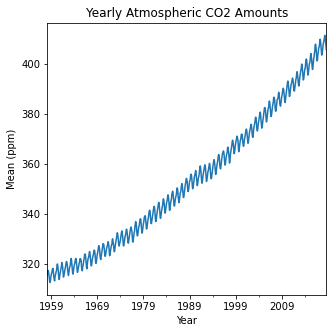

In [198]:
co2_cleaned.plot(y="Interpolated", legend=None, figsize=(5,5))

plt.xlabel('Year')
plt.ylabel('Mean (ppm)')
plt.title('Yearly Atmospheric CO2 Amounts')

Text(0.5, 1.0, 'Yearly Atmospheric CO2 Trend')

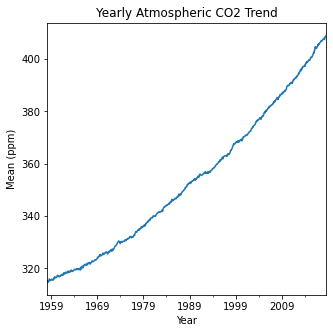

In [199]:
co2_cleaned.plot(y="Trend", legend=None, figsize=(5,5))

plt.xlabel('Year')
plt.ylabel('Mean (ppm)')
plt.title('Yearly Atmospheric CO2 Trend')

   ### Global Temperature Time Series:  
   
   **Mean**: Float()
   
   - Average global mean temperature anomalies in degrees Celsius relative to the 20th century. 
   

In [200]:
global_temp_cleaned = global_temp_raw
global_temp_cleaned['Source'] = global_temp_cleaned['Source'].astype('category')
global_temp_cleaned = global_temp_cleaned.query('Source != "GISTEMP"')

Text(0, 0.5, 'Mean')

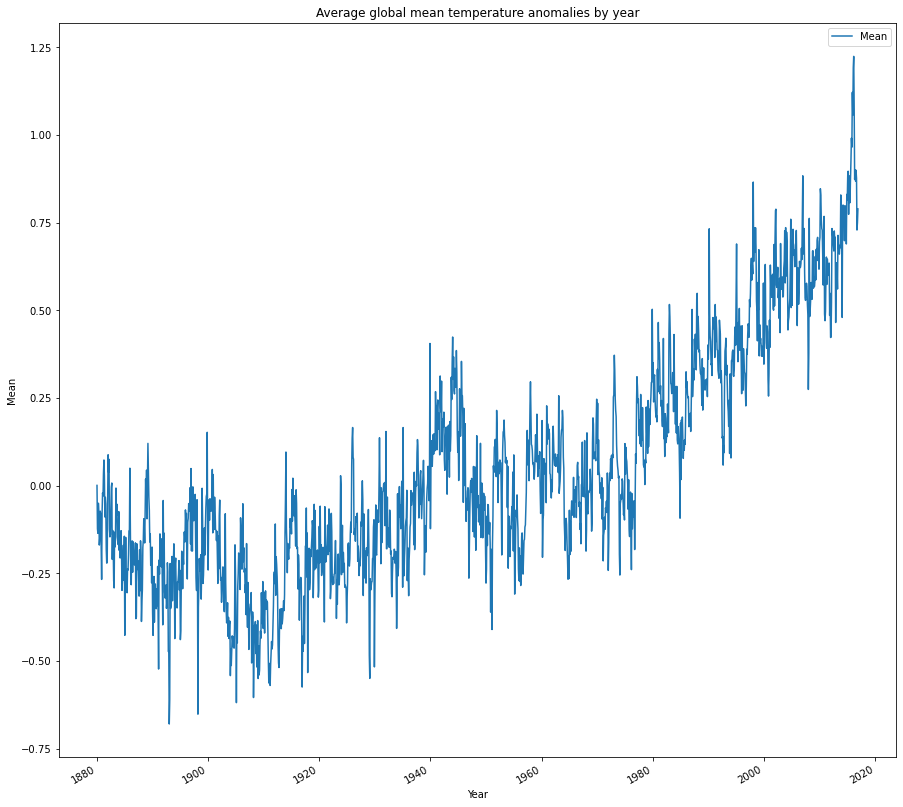

In [201]:
global_temp_cleaned.plot(y = 'Mean', figsize=(15,15))
plt.title('Average global mean temperature anomalies by year')
plt.xlabel('Year')
plt.ylabel('Mean')

   ### Global CO2 Emissions from Fossil Fuels since 1751
   
   **Total** int()
   
   - Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
   
   
   **Gas Fuel** int()
   
   - Carbon emissions from gas fuel consumption
   
   
   **Liquid Fuel** int()
   
   - Carbon emissions from liquid fuel consumption
   
   
   **Solid Fuel** int()
   
   - Carbon emissions from solid fuel consumption
   
   
   **Cement** int()
   
   - Carbon emissions from cement production
   
   
   **Gas Flaring** int()
   
   - Carbon emissions from gas flaring
   
   
   **Per Capita** int()
   
   - Per capita carbon emissions (metric tons of carbon; after 1949 only)

In [202]:

# remove records with na's
fossil_emissions_cleaned = fossil_emissions_raw.dropna()

<AxesSubplot:xlabel='Year'>

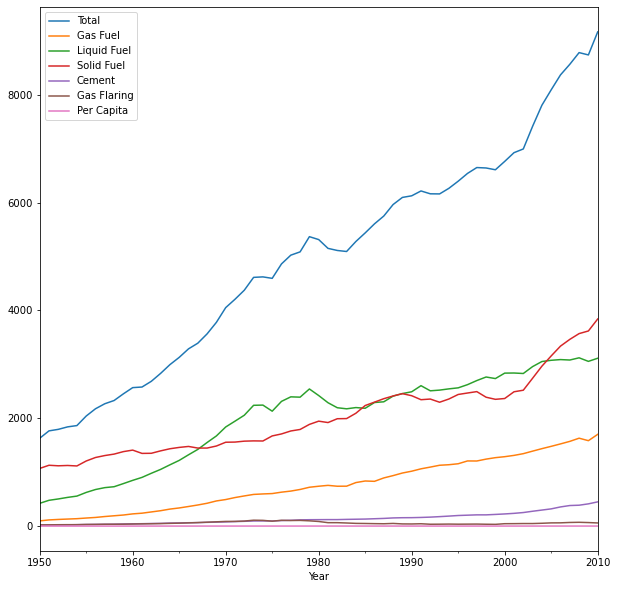

In [203]:
fossil_emissions_cleaned.plot(figsize=(10,10))

## Aggregation

We could combine these sets in order to extract more insite from the Data. For instance, if we combine the CO2 dataset with the Temperature data, we can see if there is any correlation between them.

In [204]:
combined = pd.merge_asof(co2_cleaned.sort_index(), 
                         global_temp_cleaned.sort_index(), 
                         left_index=True, 
                         right_index=True)

combined = combined.rename(columns={"Mean":"MeanTempAno"})

Now we can visualize the effect of CO2 on the mean temperature anomolies. 

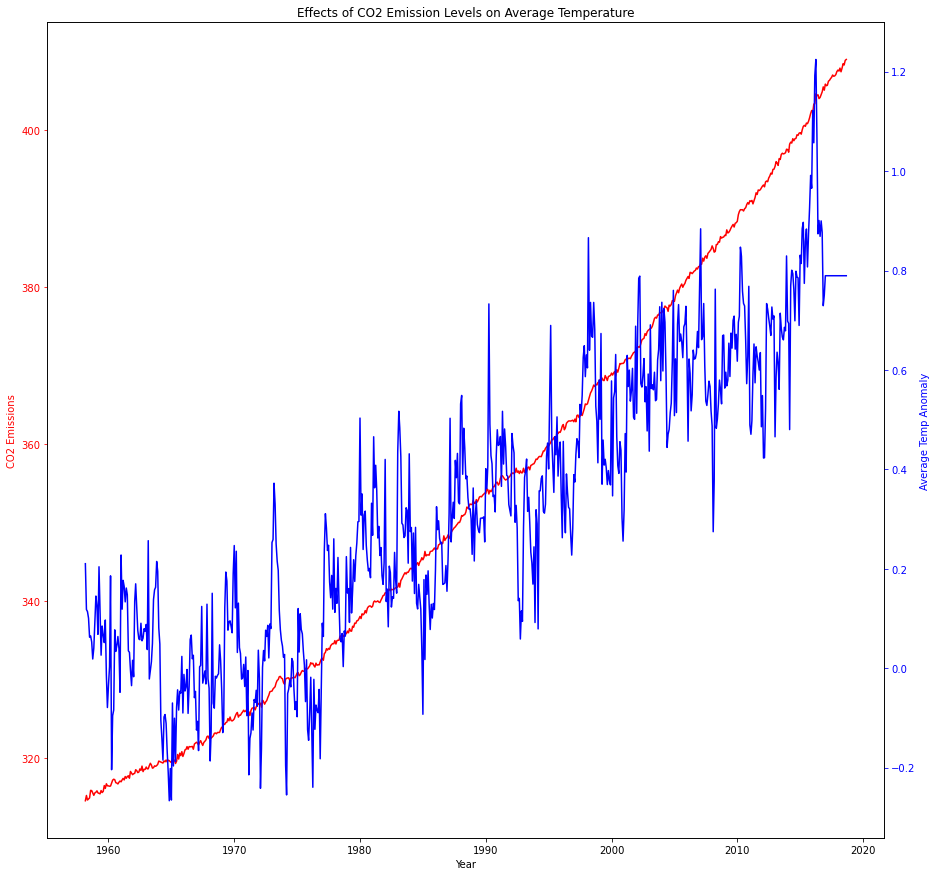

In [205]:
fig, ax = plt.subplots(figsize = (15,15))

ax.set_title("Effects of CO2 Emission Levels on Average Temperature")

ax.plot(combined.index, combined.Trend, color='r')
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions", color='r')
ax.tick_params(axis='y', colors='r')

ax1 = plt.twinx()
ax1.set_ylabel("Average Temp Anomaly", color='b')
ax1.tick_params(axis='y', colors='b')

ax1.plot(combined.index, combined.MeanTempAno, color='b')

In [206]:
co2_adveraged = co2_cleaned.reset_index()

co2_adveraged['Year'] = pd.DatetimeIndex(co2_adveraged['Date']).year

co2_adveraged_by_year = co2_adveraged.groupby('Year').agg({"Trend": "mean"})

fossil_emissions_w_year = fossil_emissions_cleaned.reset_index()

fossil_emissions_w_year['YearExtr'] = pd.DatetimeIndex(fossil_emissions_w_year['Year']).year

total_co2 = fossil_emissions_w_year.merge(co2_adveraged_by_year, right_on="Year", left_on="YearExtr")

total_co2.rename(columns={'Trend':'AtmosCo2Avg'}, inplace=True)

total_co2.set_index('YearExtr', inplace=True)

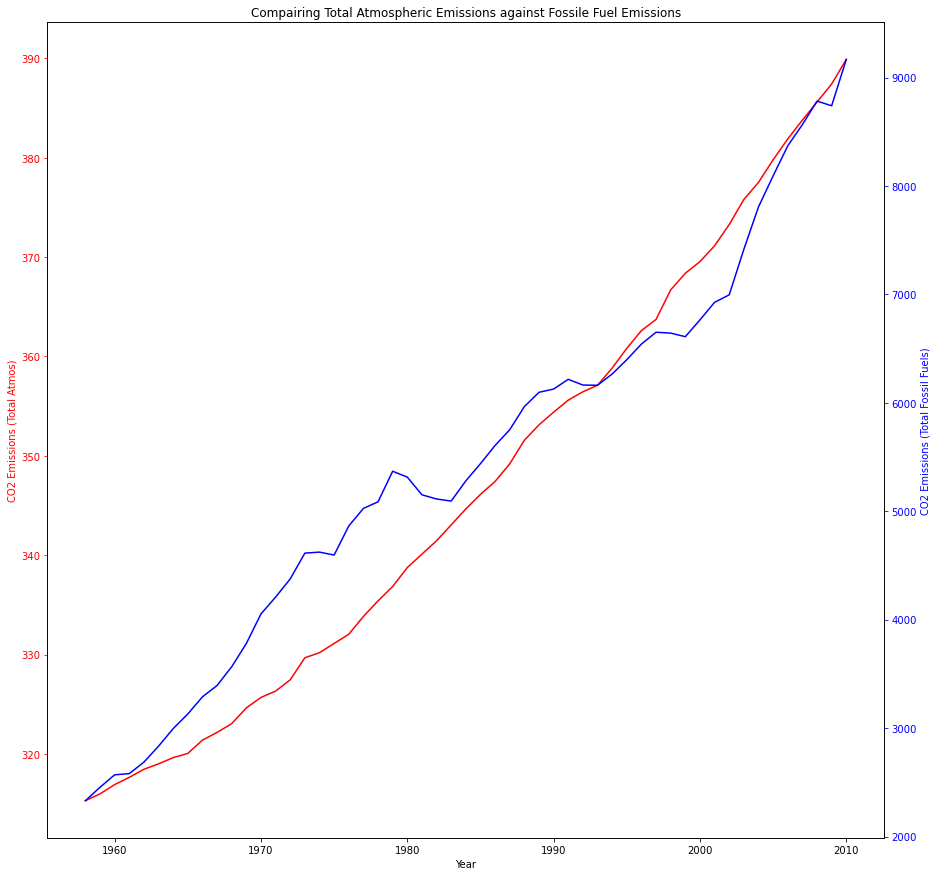

In [207]:
fig, ax = plt.subplots(figsize = (15,15))

ax.set_title("Compairing Total Atmospheric Emissions against Fossile Fuel Emissions")

ax.plot(total_co2.index, total_co2.AtmosCo2Avg, color='r')
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (Total Atmos)", color='r')
ax.tick_params(axis='y', colors='r')

ax1 = plt.twinx()
ax1.set_ylabel("CO2 Emissions (Total Fossil Fuels)", color='b')
ax1.tick_params(axis='y', colors='b')

ax1.plot(total_co2.index, total_co2.Total, color='b')


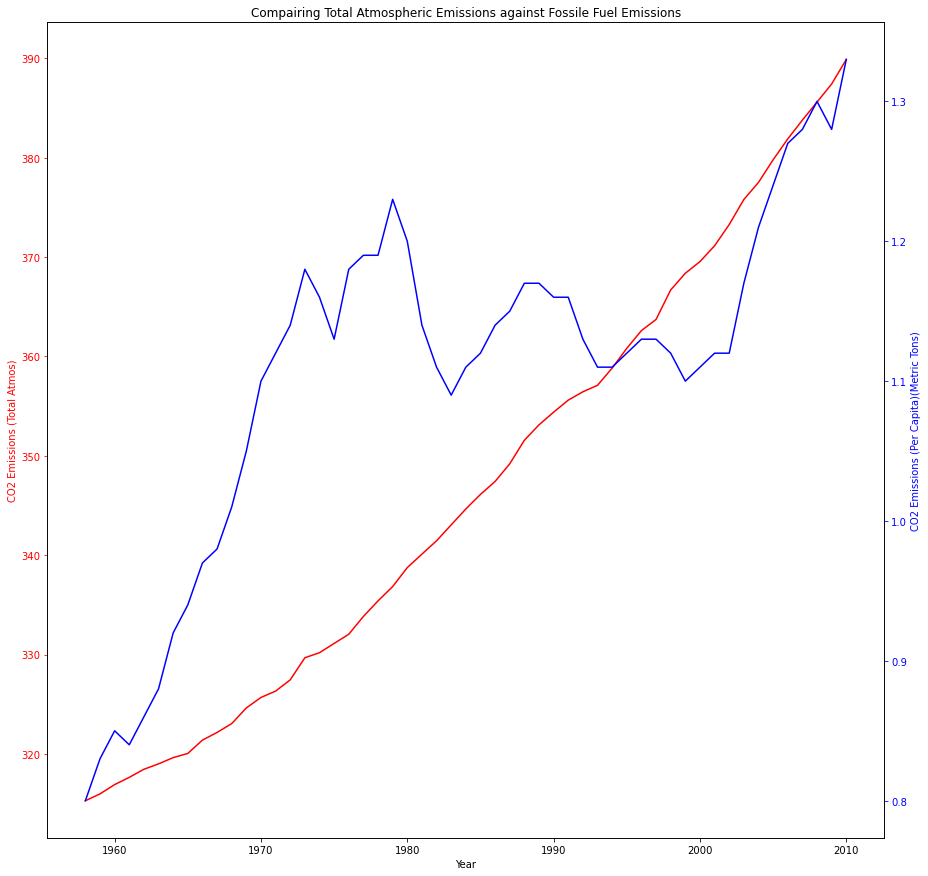

In [216]:
fig, ax = plt.subplots(figsize = (15,15))

ax.set_title("Compairing Total Atmospheric Emissions against Fossile Fuel Emissions")

ax.plot(total_co2.index, total_co2.AtmosCo2Avg, color='r')
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (Total Atmos)", color='r')
ax.tick_params(axis='y', colors='r')

ax1 = plt.twinx()
ax1.set_ylabel("CO2 Emissions (Per Capita)(Metric Tons)", color='b')
ax1.tick_params(axis='y', colors='b')

ax1.plot(total_co2.index, total_co2['Per Capita'], color='b')


In [219]:
total_co2[['Per Capita', 'AtmosCo2Avg']].corr()

,Per Capita,AtmosCo2Avg
Per Capita,1.000000,0.737145
AtmosCo2Avg,0.737145,1.000000
